In [77]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from datetime import datetime
import pickle, json, sys, os, glob
import pandas as pd
pd.set_option("display.max_columns", None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [127]:
a = "/fefs/aswg/workspace/juan.jimenez/lst_pipeline/../data/tests/crab/dl2/dl2_LST-1.Run15272.0000.h5/dl2b_LST-1.Run15272.0000.h5"
a_ = "/fefs/aswg/workspace/juan.jimenez/lst_pipeline/../data/tests/crab/dl2/dl2_LST-1.Run15272.0000_.h5/dl2b_LST-1.Run15272.0000_.h5"
a11 = "/fefs/aswg/workspace/juan.jimenez/lst_pipeline/../data/tests/crab/dl2/dl2_LST-1.Run15272.0000_1.1.h5/dl2b_LST-1.Run15272.0000_1.1.h5"
a09 = "/fefs/aswg/workspace/juan.jimenez/lst_pipeline/../data/tests/crab/dl2/dl2_LST-1.Run15272.0000_0.9.h5/dl2b_LST-1.Run15272.0000_0.9.h5"
T = pd.read_hdf(a, key='dl2/event/telescope/parameters/LST_LSTCam')
T_ = pd.read_hdf(a_, key='dl2/event/telescope/parameters/LST_LSTCam')
T11 = pd.read_hdf(a11, key='dl2/event/telescope/parameters/LST_LSTCam')
T09 = pd.read_hdf(a09, key='dl2/event/telescope/parameters/LST_LSTCam')

/tmp/ipykernel_31377/3234063623.py:16: RuntimeWarning: divide by zero encountered in divide
  ax2.errorbar((bins[1:]+bins[:-1])/2, (c-c11)/c*100, xerr=(bins[1:]-bins[:-1])/2, color="r", ls="")
/tmp/ipykernel_31377/3234063623.py:16: RuntimeWarning: invalid value encountered in divide
  ax2.errorbar((bins[1:]+bins[:-1])/2, (c-c11)/c*100, xerr=(bins[1:]-bins[:-1])/2, color="r", ls="")
/tmp/ipykernel_31377/3234063623.py:17: RuntimeWarning: invalid value encountered in divide
  ax2.errorbar((bins[1:]+bins[:-1])/2, (c-c09)/c*100, xerr=(bins[1:]-bins[:-1])/2, color="b", ls="")


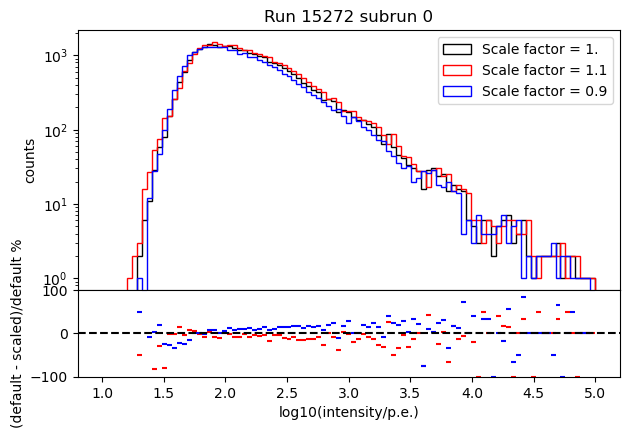

In [136]:
bins = np.linspace(1,5,100)

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(7,4.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

c, _, _   = ax.hist(T["log_intensity"],   bins=bins, histtype="step", color="k", label="Scale factor = 1.")
# c_, _, _  = ax.hist(T_["log_intensity"], bins=bins, histtype="step", color="b", ls="-", label="Scale factor = 1.01")
c11, _, _ = ax.hist(T11["log_intensity"], bins=bins, histtype="step", color="r", ls="-", label="Scale factor = 1.1")
c09, _, _ = ax.hist(T09["log_intensity"], bins=bins, histtype="step", color="b", ls="-", label="Scale factor = 0.9")
ax.set_yscale("log")
ax.legend()
ax.set_ylabel("counts")
ax.set_title(f"Run 15272 subrun 0")


# ax2.errorbar(bins[:-1], (c-c_)/c*100, xerr=bins[1:]-bins[:-1], color="b", ls="")
ax2.errorbar((bins[1:]+bins[:-1])/2, (c-c11)/c*100, xerr=(bins[1:]-bins[:-1])/2, color="r", ls="")
ax2.errorbar((bins[1:]+bins[:-1])/2, (c-c09)/c*100, xerr=(bins[1:]-bins[:-1])/2, color="b", ls="")
ax2.axhline(0, ls="--", color="k")
ax2.set_ylim(-100, 100)
ax2.set_ylabel("(default - scaled)/default %")
ax2.set_xlabel("log10(intensity/p.e.)")
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

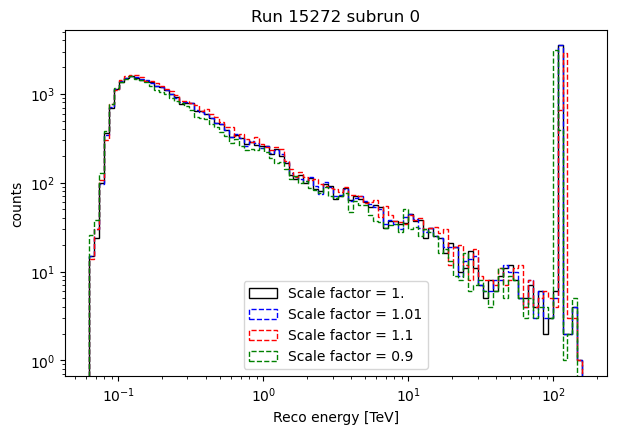

In [138]:
bins = np.logspace(-1.2,2.2,100)

fig, ax = plt.subplots(figsize=(7,4.5))

ax.hist(T["reco_energy"],   bins=bins, histtype="step", color="k", label="Scale factor = 1.")
ax.hist(T_["reco_energy"], bins=bins, histtype="step", color="b", ls="--", label="Scale factor = 1.01")
ax.hist(T11["reco_energy"], bins=bins, histtype="step", color="r", ls="--", label="Scale factor = 1.1")
ax.hist(T09["reco_energy"], bins=bins, histtype="step", color="g", ls="--", label="Scale factor = 0.9")
ax.loglog()
ax.legend()
ax.set_xlabel("Reco energy [TeV]")
ax.set_ylabel("counts")
ax.set_title(f"Run 15272 subrun 0")

plt.show()

In [78]:
T

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,width,width_uncertainty,psi,skewness,kurtosis,time_gradient,intercept,leakage_intensity_width_1,leakage_intensity_width_2,leakage_pixels_width_1,leakage_pixels_width_2,n_pixels,concentration_cog,concentration_core,concentration_pixel,n_islands,alt_tel,az_tel,sin_az_tel,calibration_id,dragon_time,ucts_time,tib_time,ucts_jump,mc_type,wl,tel_id,tel_pos_x,tel_pos_y,tel_pos_z,trigger_type,ucts_trigger_type,trigger_time,event_type,delta_t,log_reco_energy,reco_energy,reco_disp_norm,reco_disp_sign,reco_disp_sign_proba,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness
0,15272,1,8862.777790,3.947570,0.507865,0.818015,0.962847,1.015187,0.295185,0.006911,0.248163,0.004081,0.428270,-2.351831,20.430477,0.549970,11.776777,0.157300,0.322213,0.008086,0.015633,99,0.145757,0.601106,0.063586,7,0.657368,1.448165,0.992490,0,1.699142e+09,0,0,False,-9999,0.840702,1,-5.86377,60.376717,0.882712,1,1,1.699142e+09,32,0.000000,0.616239,4.132749,0.176303,1,0.433521,0.160380,0.073218,0.668245,0.891233,-0.549970,2.351831,0.679807,1.487264,101,0.004199
1,15272,2,45.577803,1.658753,-0.054529,0.765074,0.767015,1.641949,0.073061,0.004124,0.029220,0.002637,0.448457,-0.096133,1.580956,-6.558717,6.396213,0.000000,0.000000,0.000000,0.000000,4,0.905304,0.346890,0.377779,1,0.657368,1.448165,0.992490,0,1.699142e+09,0,0,False,-9999,0.399942,1,-5.86377,60.376717,0.882712,1,1,1.699142e+09,32,0.000070,-0.979527,0.104827,0.303794,1,0.339572,0.273754,0.131718,0.219224,0.896792,6.558717,0.096133,0.664485,1.487040,101,0.294892
2,15272,3,118.347130,2.073158,-0.240764,0.354283,0.428350,2.167686,0.049955,0.003394,0.042806,0.002810,0.927368,-0.172000,3.185007,9.952402,8.260110,0.000000,0.000000,0.000000,0.000000,6,0.785059,0.563567,0.563567,1,0.657368,1.448165,0.992490,0,1.699142e+09,0,0,False,-9999,0.856903,1,-5.86377,60.376717,0.882712,1,1,1.699142e+09,32,0.001181,-0.872967,0.133978,0.121652,1,0.456033,0.072984,0.097327,-0.167779,0.451610,-9.952402,0.172000,0.651552,1.467546,101,0.022914
3,15272,4,117.114019,2.068609,-0.304764,0.313721,0.437381,2.341714,0.108328,0.005343,0.028670,0.001552,-1.053539,0.144859,2.139460,8.662414,8.341254,0.000000,0.000000,0.000000,0.000000,6,0.769538,0.301811,0.301811,1,0.657368,1.448165,0.992490,0,1.699142e+09,0,0,False,-9999,0.264662,1,-5.86377,60.376717,0.882712,1,1,1.699142e+09,32,0.000266,-0.727627,0.187229,0.385062,-1,0.789363,-0.190412,0.334688,-0.495176,0.648408,8.662414,0.144859,0.640285,1.475754,0,0.537120
4,15272,5,75.581048,1.878413,-0.294547,0.665682,0.727936,1.987374,0.060725,0.003830,0.036667,0.002393,-0.701743,0.177619,2.202479,4.154026,9.149010,0.000000,0.000000,0.000000,0.000000,5,0.942882,0.446160,0.446160,1,0.657368,1.448166,0.992490,0,1.699142e+09,0,0,False,-9999,0.603827,1,-5.86377,60.376717,0.882712,1,1,1.699142e+09,32,0.001230,-1.035573,0.092136,0.230806,-1,0.531470,-0.176271,0.148997,-0.470817,0.814679,4.154026,0.177619,0.641008,1.482848,101,0.036253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32870,15272,52989,127319.848650,5.104896,-0.001160,-0.001330,0.001765,-2.288071,1.160055,0.001629,1.157004,0.001634,0.561877,-0.001020,2.004212,-0.110725,14.261208,0.091076,0.178297,0.090566,0.177358,1851,0.002199,0.252705,0.000829,1,0.659621,1.449199,0.992616,0,1.699142e+09,0,0,False,-9999,0.997370,1,-5.86377,60.376717,0.882712,5,5,1.699142e+09,0,0.000111,2.042559,110.295806,0.271419,1,0.419950,0.229690,0.144605,0.228530,0.143275,0.110725,0.001020,0.667410,1.455424,101,0.056201
32871,15272,52990,207.598867,2.317225,0.140245,0.583967,0.600571,1.335100,0.100037,0.004092,0.054122,0.002989,0.303661,0.325023,2.389462,0.358645,9.377293,0.000000,0.000000,0.000000,0.000000,10,0.559380,0.365494,0.24936